# Assignment 4

Manjyot Singh Nanra- 21111038 | 
manjyots21@iitk.ac.in

Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [1]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
import math
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal 

def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [52]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )

tmp6 = np.array([[-10,10],[-10,-10],[10,-10]])
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5,tmp6) )

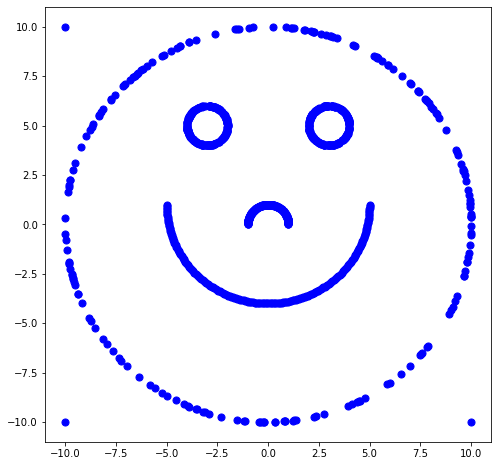

In [53]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]


(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

# Question 1) K-Means

## Question 1.A) K-Means Implement
Implementing K-means Algorithm to cluster the dataset and visualizing output.<br>
K means Algorithm is as follows.<br>
1. Initialize initial cluster centroids $\mu_1, ... , \mu_k $ (Considering output should have k-clusters)
2. For n = 1, ... , N, assign each point $x_n$ to the closest cluster.
3. Suppose $C_k = {x_n:z_n=k}$. Re-compute the means $\mu_k = mean(C_k)$ for k=1,...,K
4. Go to step 2 if not yet converged.

For convergence, we will calculate the objective loss function $L(X, Z, \mu) = \sum_{n=1}^{N} \sum_{k=1}^{K} z_{nk} || x_n - \mu_n ||^2$.<br>
If there is negligible change in loss function between 2 iterations, we will conclude it converged

I have implemented the following algorithm below

In [54]:
def get_loss(cluster_dict, centroids):
    losses = []
    for key in cluster_dict.keys():
        
        cluster_list = cluster_dict[key]
        loss = np.sum((cluster_list - centroids[key])**2)
        losses.append(loss)
    final_loss = sum(losses)
    return final_loss

def K_Means(X, centroids=[], K=5, iters=300, verbose=True):

    # Step 1)
    # If no initial centroids are defined, 
    # Set centroids as first k elements
    # Will improve upon this in k-means++
    if len(centroids)==0:
        centroids = X[:K].copy()
    no_of_points = X.shape[0]
    dimension = X.shape[1]
    current_loss = math.inf
    # Run for a specific number of iteration.
    for i in range(iters):
        
        # Step 2) Find euclidean distance from all centroids. Assign X to closest clusters
        #dist = np.array([]).reshape(no_of_points)

        li = []
        for k in range(K):
            kth_mean = centroids[k,:]
            t = np.sum((X-kth_mean)**2,axis=1)
            li.append(t)
        euc_dist = np.array(li)
        nearest_cluster = np.argmin(euc_dist, axis=0)

        cluster_map = {}

        for k in range(K):
            cluster_map[k] = []
        for j in range(no_of_points):
            cluster_map[nearest_cluster[j]].append(X[j])
        
        # Step 3) Recompute the cluster means/centroids.
        for k in range(K):
            temp_arr = cluster_map[k]
            centroids[k,:] = np.mean(temp_arr, axis=0)
        op = cluster_map
        # Step 4) Check for convergence
        # We will see what is the change in object loss function, if its too low, 
        # Then we will conclude it as converged
        
        new_loss = get_loss(cluster_map, centroids)
        if abs(new_loss - current_loss) < 0.5:
            if verbose == True:
                print("Algorithm Converged, Breaking at iteration",i)
            break
            
        current_loss = new_loss
    
    return op, centroids

Algorithm Converged, Breaking at iteration 13


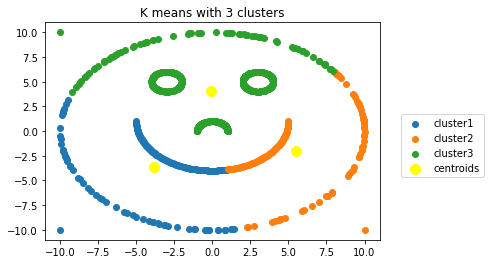

Algorithm Converged, Breaking at iteration 10


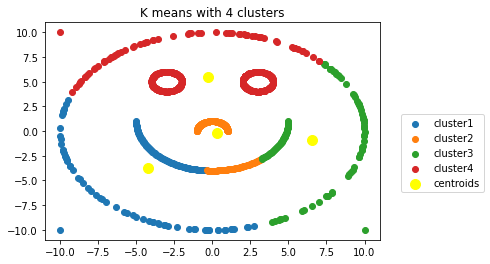

Algorithm Converged, Breaking at iteration 15


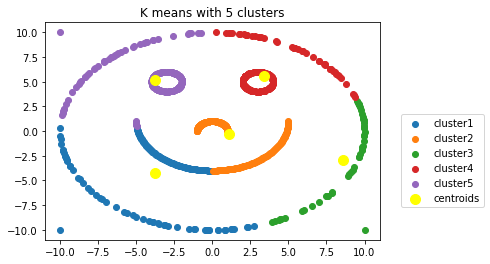

Algorithm Converged, Breaking at iteration 24


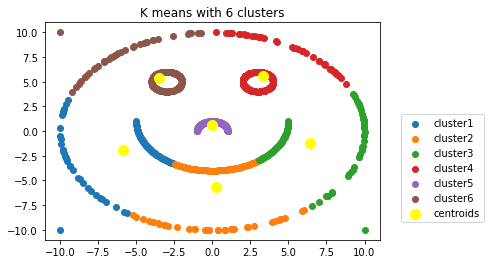

In [55]:
# Visualizing output
for K in range(3,7) :    
    cluster_list,centroids=K_Means(X,K=K)
    labels=[f"cluster{i}" for i in range(1,K+1)]
    for k in range(K):
        cluster = np.array(cluster_list[k])
        plt.scatter(cluster[:,0],cluster[:,1],label=labels[k])
        
    plt.scatter(centroids[:,0],centroids[:,1],s=100,c='yellow',label='centroids')
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    plt.title(f"K means with {K} clusters")
    plt.show()

## Question 1.B) K Means ++
Implementing K-Means++ to initialize the cluster centers carefully. <br>

1. Choose the first cluster mean uniformly randomly to be one of the data points
2. The subsequent K-1 clusters will be chosen as follows.
    1. For each unselected point x, compute its smallest distance $D(X)$ from already initialized means
    2. Select the next cluster mean unif. rand. to be one of the unselected points based on probability prop to $D(X)^2$
    3. Repeat a,b until K-1 cluster means are initialized 
3. Now run standard k-means using these initial centroids

Algorithm is implemented such that distance is calculated only with new means and not with existing means

In [56]:
# This algorithm will return array of K initial means, which will be used for 
# actual K-means implementation
def kmeans_plus_plus_init(X, K):
    X = X.copy()
    means = []
    # Step 1) Initial mean is random
    means.append(X[np.random.randint(0,len(X-1))])
    D = np.ones((len(X)))*math.inf
    latest_mean = means[-1]
    
    for k in range(1,K):
        # Step 2.1) Calculating D(X)
        dist_from_latest_mean = np.sum((X - latest_mean)**2, axis=1)
        D = np.minimum(D, dist_from_latest_mean)

        # Step 2.2) Selecting next mean uniformly from D(X)^2
        index_range = list(range(len(X)))
        Dsq = D**2
        probabs = Dsq/sum(Dsq)
        next_mean_index = np.random.choice(index_range, p=probabs)
        #next_mean_index = np.argmax(probabs)
        latest_mean = X[next_mean_index]
        # deleting new mean from data
        X = np.delete(X, next_mean_index, axis=0)
        D = np.delete(D, next_mean_index)
        means.append(latest_mean)

    return np.array(means)

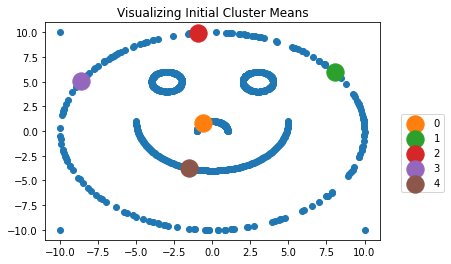

In [59]:
K=5

means = kmeans_plus_plus_init(X, K)
means = np.array(means)

plt.scatter(X[:,0],X[:,1])
for i in range(len(means)):
    elem = means[i,:]
    plt.scatter(elem[0],elem[1],s=300,label=f"{i}")
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.title("Visualizing Initial Cluster Means")
plt.show()

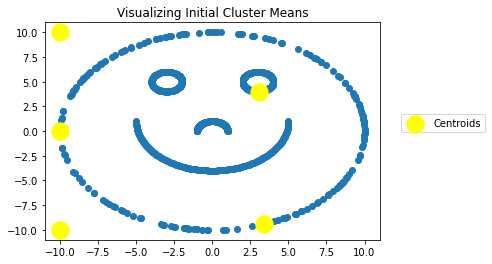

In [43]:
K=5

means = kmeans_plus_plus_init(X, K)
means = np.array(means)

plt.scatter(X[:,0],X[:,1])
plt.scatter(means[:,0],means[:,1],s=300,c='yellow',label='Centroids')
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.title("Visualizing Initial Cluster Means")
plt.show()

In [15]:
np.argmax(probabs)

424

In [8]:
def K_Means_Plus_Plus(X, K=5, verbose=True):
    # K means plus plus is just getting the initial means and calling actual K means
    init_mean = kmeans_plus_plus_init(X, K=K)
    cluster_dict,centroids = K_Means(X,K=K,centroids=init_mean,verbose=verbose)

    return cluster_dict, centroids

Visualizing Output for K=3 to 6

Algorithm Converged, Breaking at iteration 13


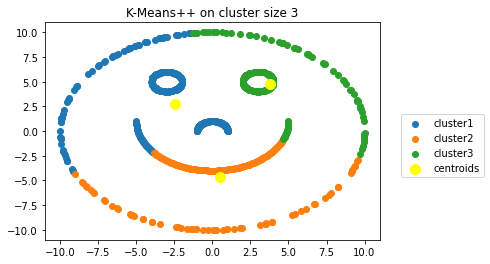

Algorithm Converged, Breaking at iteration 9


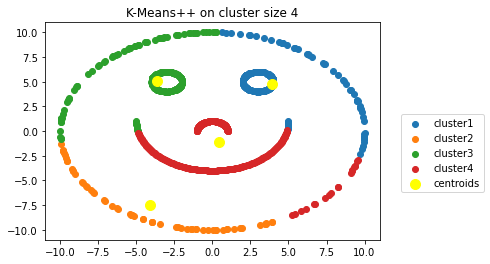

Algorithm Converged, Breaking at iteration 6


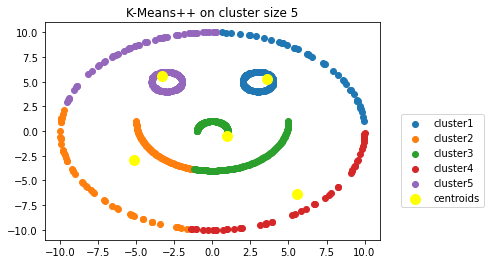

Algorithm Converged, Breaking at iteration 13


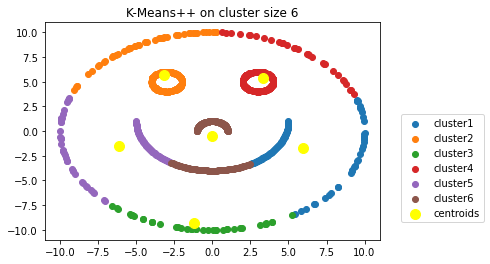

In [9]:
for K in range(3,7) :    
    
    cluster_dict,centroids = K_Means_Plus_Plus(X, K=K)

    labels=[f"cluster{i}" for i in range(1,K+1)]
    for k in range(K):
        cluster = np.array(cluster_dict[k])
        plt.scatter(cluster[:,0],cluster[:,1],label=labels[k])
    plt.scatter(centroids[:,0],centroids[:,1],s=100,c='yellow',label='centroids')
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    plt.title(f"K-Means++ on cluster size {K}")
    plt.show()

### Few words on K-Means ++
We can see that, after implementing K-Means++, our cluster centers are initiated reasonably far away from each other.<br>
In original k-means algorithm, sometimes its happening that cluster means are too close to each other.(Note this is happening sometimes and might not be visible with every run)<br>
Thus K-means++ helps avoid this and give reasonably better clusters, because of good initialization. Also it can be noted that K-Means ++ is more likely to converge quicker due to good initialization

## Question 1.C) Finding Best K value


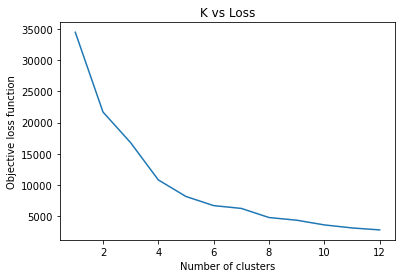

In [10]:
loss_list = []
start, end = 1,13
for K in range(start,end):
    cluster_dict, centroids = K_Means_Plus_Plus(X, K=K,verbose=False)
    loss = get_loss(cluster_dict, centroids)
    loss_list.append(loss)


plt.plot(range(start,end),np.array(loss_list))
plt.ylabel("Objective loss function")
plt.xlabel("Number of clusters")
plt.title("K vs Loss")
plt.show()

We see that even though loss keeps decreaing, we choose an elbow point, that gives us good loss, and beyond the elbow point, loss decreases at low rate giving diminishing returns. <br>
For us, this elbow point for K value is around 5 to 7.<br>
Happiness with cluster:<br>
Although K value of 5 to 7 is giving good loss and is elbow point, and gives decent clustering, its not perfect. Ideally from image, we can visualize that an Ideal cluster would be of size = 5. Two cluster for each eyes, one cluster for mouth, one for nose, and one for outline.<br>
This is not being achieved in normal K-Means, because we calculate Euclidean distance in 2-D. We would need to use kernel techniques that project points to higher dimensions implicitly to give better cluster points. We will do this in question 1.D 

## Question 1.D) Kernel K-Means
Kernelizing K-Means Algorithm with Gaussian kernel, so that we obtain better Kernels<br>
Gaussian Distance between two vectors is given as $distance = exp(\frac{||x-y||^2}{2\sigma^2}) $
REF: [Reference](https://data-flair.training/blogs/svm-kernel-functions/)<br>

We will calculate Kernel Matrix, this will be calculating pair wise distance among each points.<br>
Output will be a 1000x1000 matrix because we have 1000 data points

We will use this kernel matrix as input to the K-Means algorithm, and perform K-Means clustering on it to get cluster points. We will keep track of which points are being clustered together which will later be used to visualize the output

In [11]:
def get_kernel_distance(Xi, Xj, sigma):
    # This funciton gets the Gaussian distance between 2 vector inputs
    sum = np.sum((Xi - Xj)**2)
    base = 2 * (sigma**2)
    #mult = 1/(math.sqrt(2*math.pi) * sigma)
    
    output = math.exp(-sum/base) 
    return output


def get_kernel_matrix(X, sigma=4):
    # this function is used to get the kernel matrix ouput, given X data input
    no_of_points = len(X)

    kernel_matrix = np.zeros((X.shape[0],X.shape[0]))


    # calculating pair wise higher dimension distance
    for i in range(no_of_points):
        for j in range(i, no_of_points):

            if i == j:
                continue
                
            kernel_matrix[i][j] = get_kernel_distance(X[i], X[j], sigma=sigma)
            # kernel[i][j] will be equal to kernel[j][i]
            kernel_matrix[j][i] = kernel_matrix[i][j]
    
    return kernel_matrix

In [12]:
def kernel_k_means(X,kernel_matrix, K=5, iters=400):
    
    # Step 1)
    # Use K-means ++ to get initial centroids
    centroids = kmeans_plus_plus_init(kernel_matrix, K)
    no_of_points = X.shape[0]
    dimension = X.shape[1]
    current_loss = math.inf

    # Run for a specific number of iteration.
    for i in range(iters):
        
        # Step 2) Find euclidean distance from all centroids. Assign it to closest clusters
        # Note We are using the Kernel matrix instead of X.
        #dist = np.array([]).reshape(no_of_points)
        li = []
        for k in range(K):
            kth_mean = centroids[k,:]
            t = np.sum((kernel_matrix - kth_mean)**2,axis=1)
            li.append(t)
        euc_dist = np.array(li)
        nearest_cluster = np.argmin(euc_dist, axis=0)

        cluster_map = {}
        cluster_map_2D = {}
        for k in range(K):
            cluster_map[k] = []
            cluster_map_2D[k] = []
        for j in range(no_of_points):
            cluster_map[nearest_cluster[j]].append(kernel_matrix[j])
            cluster_map_2D[nearest_cluster[j]].append(X[j])
            
        # Step 3) Recompute the cluster means/centroids.
        for k in range(K):
            temp_arr = cluster_map[k]
            centroids[k,:] = np.mean(temp_arr, axis=0)
        op1 = cluster_map_2D
        op2 = cluster_map

        # Step 4) Check for convergence
        # We will see what is the change in object loss function, if its too low, 
        # Then we will conclude it as converged
        new_loss = get_loss(cluster_map, centroids)

        if abs(new_loss - current_loss) < 0.5:
            print("Algorithm Converged, Breaking at iteration",i)
            break
        current_loss = new_loss

    return op1, op2, centroids

In [13]:
kernel_matrix = get_kernel_matrix(X, sigma=4)

Visualizing Output for K=3 to 6

Algorithm Converged, Breaking at iteration 6


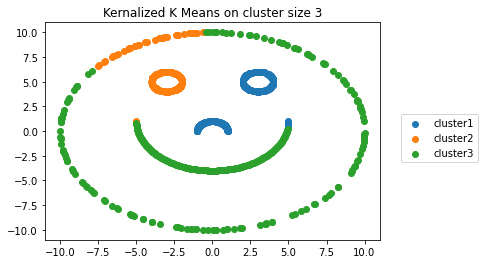

Algorithm Converged, Breaking at iteration 8


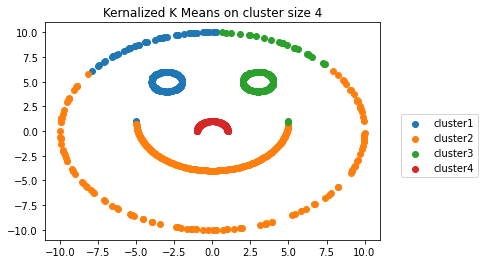

Algorithm Converged, Breaking at iteration 7


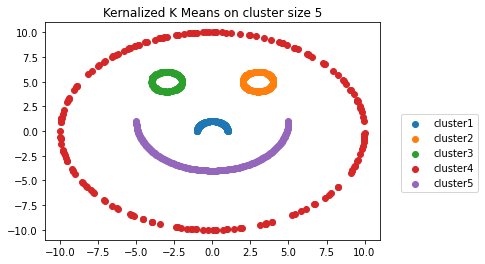

Algorithm Converged, Breaking at iteration 9


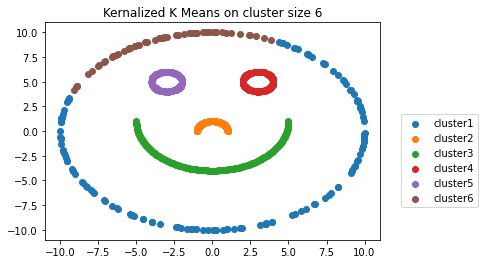

In [14]:
for K in range(3,7):
    cluster_list, op2,centroids=kernel_k_means(X, kernel_matrix, K=K)

    labels=[f"cluster{i}" for i in range(1,K+1)]
    for k in range(K):
        cluster = np.array(cluster_list[k])
        plt.scatter(cluster[:,0],cluster[:,1],label=labels[k])
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    plt.title(f"Kernalized K Means on cluster size {K}")
    plt.show()

We can see that kernalized K-Means algorithm far better than Non kernalized version. This is because it maps implicitly points to higher dimension. Hence we are able to perform K-means on higher dimension to get good clusters, i.e actual cluster containing points nearby to each other.<br>
Since our Data contains 5 distinct elements, cluster size K=5 gives perfect output<br>
Note that kernalized K-means won't give desired kernel sometimes, this is due to randomized implementation, although this case is rare, if encountered, please re-run code

# Question 2 Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

## Question 2A) Deriving Expectation Maximization

We have to derive E-step and M-step of EM algorithm that would work for a Gaussian mixture model. <br>
There are two changes in the conditions
- $\pi_k$ are known
- $\sum_{k} = \sigma_{k}^2 I$, i.e Covariances are restricted to be spherical.

Thus our E-M algorithm will change accordingly.<br>
We define  $\theta=\{\mu_k, \sum_{k}\}_{k=1}^{K}$.<br> 
We need to maximize $E[log{p(X,Z|\theta)}]$ to find $\theta_{mle}$.
Not finding $\pi_k$ because its known

E-Step is given as calculating $P(Z|X,\theta)$. We will compute seperately for each n and each k<br>
$p(z_n =k | x_n, \hat{\theta}) \propto p(z_n =k|\hat{\theta}) p(x_n|z_n=k,\hat{\theta}) \propto \pi_k \mathcal{N}(x_n|\hat{\mu_k},\hat{\sigma_{k}^2}I)$

Normalizing, we get the expectation as  <br>
$E[z_{nk}] = p(z_n =k | x_n, \hat{\theta}) = \frac{\pi_k \mathcal{N}(x_n|\hat{\mu_k},\hat{\sigma_{k}^2}I)}{\sum_{j=1}^{K}\pi_j \mathcal{N}(x_n|\hat{\mu_j},\hat{\sigma_{j}^2}I)}$

Now for M-step, we need to maximize the expected complete data log-likelihood, to update $\hat{\theta}$<br>
$\hat\theta = argmax_\theta E_{p(Z|X,\hat\theta)}[log p(X,Z|\theta)]$<br><br>
$= argmax_\theta \sum_{n=1}^{N} E_{p(z_n|x_n,\hat\theta)}[log p(x_n,z_n|\theta)]$<br><br>
$= argmax_\theta \sum_{n=1}^{N} \sum_{k=1}^{K} E[z_{nk}][log{\pi_k} + log N(x_n|\mu_k, \sigma_k I)]$<br><br>
$= argmax_\theta \sum_{n=1}^{N} \sum_{k=1}^{K} E[z_{nk}]log{\pi_k} + E[z_{nk}]log N(x_n|\mu_k, \sigma_k I)$

Focusing on term $E[z_{nk}]log N(x_n|\mu_k, \sigma_k)$. It can be expanded as <br>
$E[z_{nk}]log N(x_n|\mu_k, \sigma_k) = E[z_{nk}]log [\frac{1}{\sqrt{2\pi*\sigma^{2d}}}exp(-(x_n - \mu_k)^2 / \sigma_k^2)]$<br>
$E[z_{nk}]log N(x_n|\mu_k, \sigma_k) = E[z_{nk}][log1 - (0.5log2pi + 0.5log\sigma_k^{2d}) -(x_n - \mu_k)^2 / \sigma_k^2] $<br>
$E[z_{nk}]log N(x_n|\mu_k, \sigma_k) = E[z_{nk}][c - d*log\sigma_k -(x_n - \mu_k)^2 / \sigma_k^2] $


Thus, <br>
$ \hat\theta = argmax_\theta \sum_{n=1}^{N} \sum_{k=1}^{K} E[z_{nk}]log{\pi_k} + E[z_{nk}][c - d*log\sigma_k -(x_n - \mu_k)^2 / \sigma_k^2]$

We need to maximize this and find $\theta$ parameters, i.e $\mu$ and $\sigma$.<br>
PART A]<br>
Finding $\mu_k$ first, differentiating w.r.t $\mu_k$ and equating to 0.<br>
Notice that $E[z_{nk}] log{\pi_k}$ is constant w.r.t $\mu_k$<br>
$\frac{\partial{\hat\theta}}{\partial{\mu_k}} = \sum_{n=1}^{N}\frac{\partial{E[z_{nk}]log{\pi_k}}}{\partial{\mu_k}} + \frac{\partial{}}{\partial{\mu_k}}[E[z_{nk}][c - d*log\sigma_k -(x_n - \mu_k)^2 / \sigma_k^2]] = 0$<br>
$\sum_{n=1}^{N}0 +E[z_{nk}][0 - 0 -2(x_n - \mu_k) / \sigma_k^2] = 0$

$\sum_{n=1}^{N}E[z_{nk}][-2(x_n - \mu_k) / \sigma_k^2] = 0$

$ \sum_{n=1}^{N}E[z_{nk}] \mu_k= \sum_{n=1}^{N}E[z_{nk}] x_n $<br>
$\mu_k  = \frac{\sum_{n=1}^{N}E[z_{nk}] x_n} {\sum_{n=1}^{N}E[z_{nk}]}$


PART B]<br>
Finding $\sigma_k$ now, differentiating equation w.r.t $\sigma_k$ and equating to 0.<br>
$\frac{\partial{\hat\theta}}{\partial{\sigma_k}} = \sum_{n=1}^{N}\frac{\partial{}}{\partial{\sigma_k}}[E[z_{nk}]log{\pi_k}] + \frac{\partial{}}{\partial{\sigma_k}}[E[z_{nk}][c - d*log\sigma_k -(x_n - \mu_k)^2 / \sigma_k^2]] = 0$<br>



$\sum_{n=1}^{N}0 +E[z_{nk}][0 - d/\sigma_k - \frac{(x_n - \mu_k)^2 * (-2)}{2 * \sigma_k^3}] = 0$

$\sum_{n=1}^{N}E[z_{nk}][- \frac{d}{\sigma_k} + \frac{(x_n - \mu_k)^2}{\sigma_k^3}] = 0$

$\sum_{n=1}^{N}E[z_{nk}][\frac{-d*\sigma_k^2 +  (x_n - \mu_k)^2}{\sigma_k^3}] = 0$

$\sum_{n=1}^{N}E[z_{nk}][d*\sigma_k^2]  =\sum_{n=1}^{N}E[z_{nk}]   (x_n - \mu_k)^2 $

$[d*\sigma_k^2] \sum_{n=1}^{N}E[z_{nk}]  =\sum_{n=1}^{N}E[z_{nk}]   (x_n - \mu_k)^2 $

$\sigma_k^2   =\frac{\sum_{n=1}^{N}E[z_{nk}]   (x_n - \mu_k)^2}{\sum_{n=1}^{N}E[z_{nk}] * d} $

Thus, putting it all together, EM algorithm is given as <br>
1) Initialize $\theta = {\mu_k, \sigma_k}_{k=1}^{K}$, set t=1
2) E step: 

$$E[z_{nk}]^{(t+1)}=\frac{\pi_k \mathcal{N}(x_n|\hat{\mu_k^t},\hat{\sigma_{k}^{t^2}}I)}{\sum_{j=1}^{k}\pi_j \mathcal{N}(x_n|\hat{\mu_j^t},\hat{\sigma_{j}^{t^2}}I)} ;\forall n,k$$

3) M-Step:

$$\mu_k^{(t+1)}  = \frac{\sum_{n=1}^{N}E[z_{nk}]^{(t+1)} x_n} {\sum_{n=1}^{N}E[z_{nk}]^{(t+1)}}$$


$$\sigma_k^{(t+1)^2}   =\frac{\sum_{n=1}^{N}E[z_{nk}]^{(t+1)} (x_n - \mu_k^{(t+1)})^2}{\sum_{n=1}^{N}E[z_{nk}]^{(t+1)} * d} $$

## Question 2.b) Implement

Using the Above equations, I will implement the code. Have added comments on what is happening where

We will be using log likelihood of data as loss. We will see whether between two iteration does the loss changes

In [15]:
def log_sum_exp(Z):
    return np.max(Z) + np.log(np.sum(np.exp(Z - np.max(Z))))


def get_loglikelihood(data, weights, means, covs):
    no_clusters,no_dim = len(means),len(data[0])

    loglikelihood = 0
    for d in data:

        Z = np.zeros(no_clusters)
        for k in range(no_clusters):

            # Compute (x-mu)^T * Sigma^{-1} * (x-mu)
            delta = np.array(d) - means[k]
            expon = np.dot(delta.T, np.dot(
                np.linalg.inv(covs[k]), delta))

            # Compute loglikelihood contribution for this data point and this cluster
            Z[k] += np.log(weights[k])
            Z[k] -= 1/2. * (no_dim * np.log(2*np.pi) +
                            np.log(np.linalg.det(covs[k])) + expon)

        # Increment loglikelihood contribution of this data point across all clusters
        loglikelihood += log_sum_exp(Z)

    return loglikelihood

In [16]:
def get_means(data, E_matrix, sum_of_E):
    no_clusters, no_data = len(sum_of_E),len(data)

    means = [np.zeros(len(data[0]))] * no_clusters

    for k in range(no_clusters):
        # Update means using the formula derived above
        tot_sum = 0.
        for i in range(no_data):
            tot_sum += data[i] * E_matrix[i][k]

        means[k] = tot_sum / sum_of_E[k]

    return means

def get_sum_of_E(E_matrix):

    soft_cnt = np.sum(E_matrix, axis=0)
    return soft_cnt


def compute_E(data, weights, means, covariances):
    no_data, no_clusters = len(data), len(means)
    
    E_matrix = np.zeros((no_data, no_clusters))

    # Computing E value for each point and each cluster
    for i in range(no_data):
        for k in range(no_clusters):

            mult1 = multivariate_normal.pdf(
                data[i], mean=means[k], cov=covariances[k])

            E_matrix[i, k] = weights[k] * mult1

    # normalizing the matrix
    row_sums = E_matrix.sum(axis=1)[:, np.newaxis]
    E_matrix = E_matrix / row_sums

    return E_matrix


def get_vector_dot(xi, xj):
    return np.dot(xi - xj, xi - xj)

def get_covariance(data, E_matrix, sum_of_E, means):
    no_clusters, no_dim, no_data = len(sum_of_E), len(data[0]), len(data)
    covariances = [np.zeros((no_dim, no_dim))] * no_clusters

    for k in range(no_clusters):
        # Updating covariance based on formula derived above
        tot_sum = np.zeros((no_dim, no_dim))
        for i in range(no_data):
            tot_sum += E_matrix[i][k] * get_vector_dot(data[i], means[k])
        
        fin_cov = (tot_sum*np.identity(no_dim))
        covariances[k] = fin_cov/sum_of_E[k]
    return covariances


In [17]:
def ExpectationMaximization(data, init_means, init_covariances, init_weights, iters=500, tol=1e-8):

    # Getting initial vals. and setting
    means = init_means[:]
    covariances = init_covariances[:]
    weights = init_weights[:]

    # Initializing
    no_data = len(data)
    no_clusters = len(means)

    E_matrix = np.zeros((no_data, no_clusters))
    log_likelihood = get_loglikelihood(data, weights, means, covariances)

    for iter in range(iters):

        # E-step: compute the expectation
        E_matrix = compute_E(data, weights, means, covariances)

        # M-step
        # Computing total sum of E matrix which will be used later, because it appears in formula
        sum_of_E = get_sum_of_E(E_matrix)

        # Maximizing step, getting t+1 means
        means = get_means(data, E_matrix, sum_of_E)
        # Maximizing step, getting t+1 covariance
        covariances = get_covariance(data, E_matrix, sum_of_E, means)

        # getting log likelihood
        loglikelihood_latest = get_loglikelihood(
            data, weights, means, covariances)

        # log likelihood to check convergence
        if (loglikelihood_latest - log_likelihood) < tol and loglikelihood_latest > -np.inf:
            break
        log_likelihood = loglikelihood_latest

    print("Completed at iteration",iter)
    output = {'means': means,
              'covar': covariances}

    return output


Defining what the clusters would look like

In [18]:
init_means = [
    [-10, -10],  #  cluster 1
    [0, 5],  #  cluster 2
    [10, -4]  #  cluster 3
]
init_covariances = [
                    [[.4, 0.], [0, .4]],  # cluster 1
                    [[.6, 0.], [0., .6]],  # cluster 2
                    [[.7, 0.], [0, .7]]  # cluter 3
]
init_weights = [1/3, 1/4, 5/12]  # weights of each cluster


In [19]:
def get_synthetic_data(num_data, means, covariances, weights):
    # generate synthetic data
    data = []
    for i in range(num_data):
        k = np.random.choice(len(weights), 1, p=weights)[0]
        x = np.random.multivariate_normal(means[k], covariances[k])

        data.append(x)
    return data



Generating the synthetic data and Visualizing the synthetic data

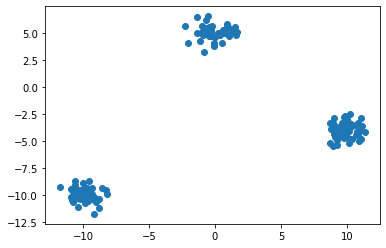

In [20]:
# Generate data
np.random.seed(1000)
data_points = get_synthetic_data(150, init_means, init_covariances, init_weights)
# visualize
plt.figure()
d = np.vstack(data_points)
plt.scatter(d[:, 0], d[:, 1])

plt.show()


Writing code to compute contours to plot with clusters

In [21]:
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                     mux=0.0, muy=0.0, sigmaxy=0.0):
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom


def plot_contours(data, means, covs, title):
    plt.figure()
    d = np.vstack(data)

    plt.scatter(d[:, 0], d[:, 1])


    delta = 0.025
    k = len(means)
    x = np.arange(-12.0, 12.0, delta)
    y = np.arange(-12.0, 12.0, delta)
    X, Y = np.meshgrid(x, y)
    col = ['orange', 'red', 'green']
    for i in range(k):
        mean = means[i]
        cov = covs[i]
        sigmax = np.sqrt(cov[0][0])
        sigmay = np.sqrt(cov[1][1])
        sigmaxy = cov[0][1]/(sigmax*sigmay)
        Z = bivariate_normal(X, Y, sigmax, sigmay, mean[0], mean[1], sigmaxy)
        plt.contour(X, Y, Z, colors=col[i])
        plt.title(title)


Showing the initial cluster assignment and data

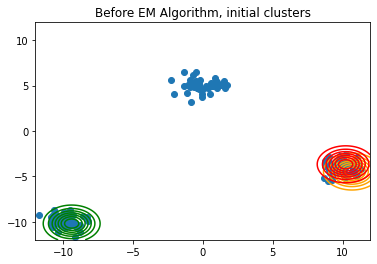

In [22]:
np.random.seed(31)

# Initialization of parameters
chosen = np.random.choice(len(data_points), 3, replace=False)
initial_means = [data_points[x] for x in chosen]
initial_covs = [[[1, 0], [0, 1]]] * 3
initial_weights = init_weights
plot_contours(data_points, initial_means, initial_covs, 'Before EM Algorithm, initial clusters')


Final cluster assignment after applying EM algorithm

Completed at iteration 4


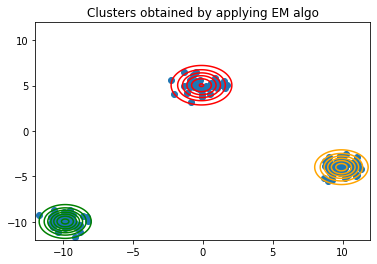

In [23]:
results = ExpectationMaximization(data_points, initial_means, initial_covs, initial_weights)
plot_contours(data_points, results['means'], results['covar'], 'Clusters obtained by applying EM algo')

Thus we can see that EM algorithm worked well and provided us cluster outputs.